In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df = pd.read_csv('My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [4]:
dfcopy = df.copy() # copy the data
dfcopy = dfcopy.drop(dfcopy.index[1155]) # Delete the last row

dfcopy['START_DATE*'] = pd.to_datetime(dfcopy['START_DATE*']) # make the start date and the end column as a datetime
dfcopy['END_DATE*'] = pd.to_datetime(dfcopy['END_DATE*'])

# Get the hour and month and day of week and the date from the data
dfcopy['Hour'] = dfcopy['START_DATE*'].apply(lambda time: time.hour)
dfcopy['Month'] = dfcopy['START_DATE*'].apply(lambda time: time.month)
dfcopy['Day of Week'] = dfcopy['START_DATE*'].apply(lambda time: time.dayofweek)
dfcopy['Date'] = dfcopy['START_DATE*'].apply(lambda time: time.date())
dfcopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Month,Day of Week,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,1,5,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,5,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,1,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,2,2016-01-06


In [5]:
# Convert Day of Week to text
daymap ={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dfcopy['Day of Week'] = dfcopy['Day of Week'].map(daymap)
dfcopy.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Hour,Month,Day of Week,Date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,Fri,2016-01-01
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,1,Sat,2016-01-02
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,1,Sat,2016-01-02
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,1,Tue,2016-01-05
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,1,Wed,2016-01-06


In [6]:
dfcopy['Hour'].unique()

array([21,  1, 20, 17, 14, 13,  8, 12, 15, 18, 19, 11, 16,  0,  9, 10, 23,
        3,  7,  5, 22,  6,  2], dtype=int64)

In [7]:
dfcopy[(dfcopy['Hour'] >= 1) & (dfcopy['Hour'] <= 14)] = dfcopy[(dfcopy.Hour >= 1) & (dfcopy.Hour <= 14)].fillna({'PURPOSE*':'Meeting'})
dfcopy[(dfcopy['Hour'] >= 15) & (dfcopy['Hour'] <= 21)] = dfcopy[(dfcopy['Hour'] >= 15) & (dfcopy['Hour'] <= 21)].fillna({'PURPOSE*':'Meal/Entertain'})
dfcopy[(dfcopy['Hour'] >= 22) | (dfcopy['Hour'] == 0)] = dfcopy[(dfcopy['Hour'] >= 22) | (dfcopy['Hour'] == 0 )].fillna({'PURPOSE*':'Meeting'})
dfcopy[(dfcopy['Hour'] == 0)] = dfcopy[(dfcopy['Hour'] == 0)].fillna({'PURPOSE*':'Meeting'})

In [8]:
dfcopy.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
Hour           0
Month          0
Day of Week    0
Date           0
dtype: int64

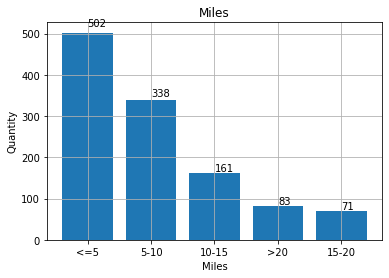

In [9]:
# Miles
ml_dis=dfcopy["MILES*"]
ml_range_lst=["<=5","5-10","10-15","15-20",">20"]
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.03*height, '%s' % int(height))
ml_dic=dict()
for item in ml_range_lst:
    ml_dic[item]=0
for mile in ml_dis.values:
    if mile<=5:
        ml_dic["<=5"]+=1
    elif mile<=10:
        ml_dic["5-10"]+=1
    elif mile<=15:
        ml_dic["10-15"]+=1
    elif mile<=20:
        ml_dic["15-20"]+=1
    else:
        ml_dic[">20"]+=1
ml_dis=pd.Series(ml_dic)
ml_dis.sort_values(inplace=True,ascending=False)

rects=plt.bar(range(1,len(ml_dis.index)+1),ml_dis.values)
plt.title("Miles")
plt.xlabel("Miles")
plt.ylabel("Quantity")
plt.xticks(range(1,len(ml_dis.index)+1),ml_dis.index)
plt.grid()
autolabel(rects)

Meeting            436
Meal/Entertain     413
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64


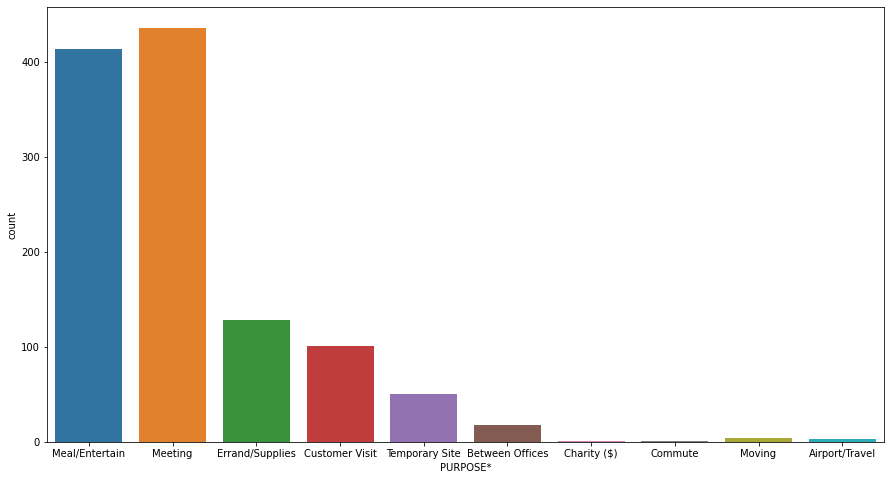

In [10]:
# Purpose
print(dfcopy['PURPOSE*'].value_counts())
plt.figure(figsize=(15,8))
sns.countplot(x=dfcopy['PURPOSE*'])
plt.show()

<AxesSubplot:xlabel='Month', ylabel='MILES*'>

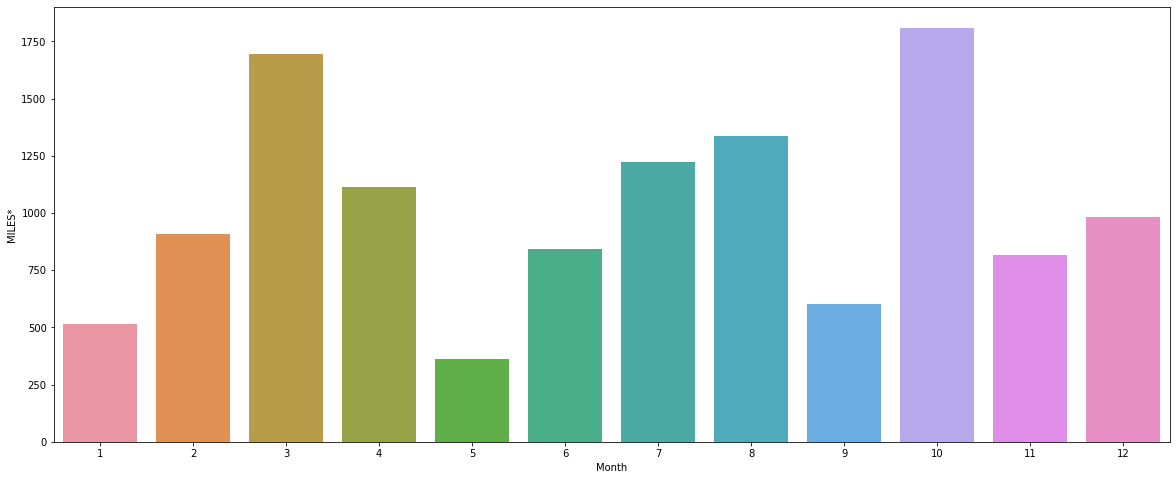

In [11]:
# Month
per_month =pd.DataFrame()
per_month =dfcopy.groupby('Month').sum()
plt.figure(figsize=(20,8))
sns.barplot(x='Month',y='MILES*',data=per_month.reset_index())

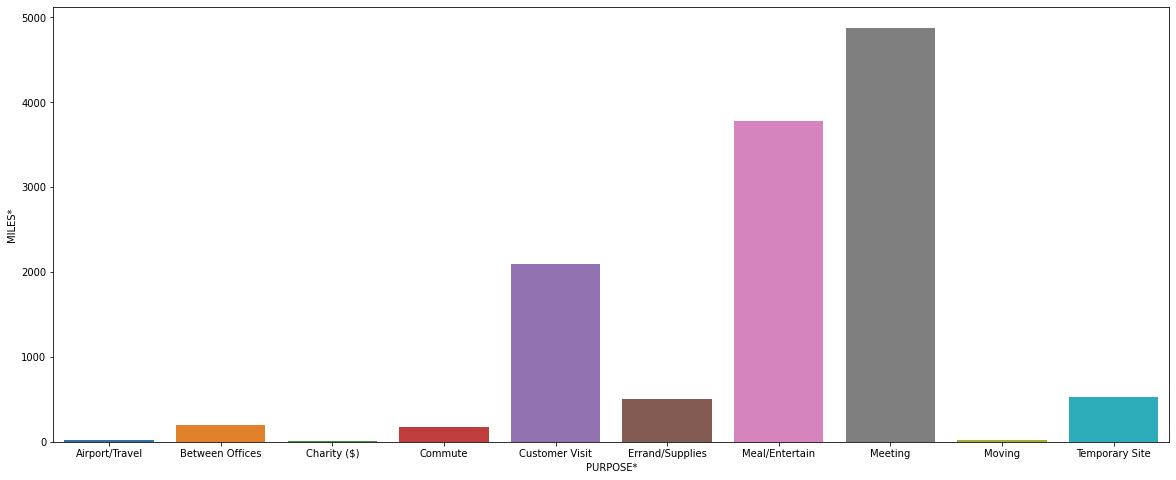

In [12]:
# Purpose and Miles
Pur_Mil = dfcopy.groupby('PURPOSE*')['MILES*'].sum()
plt.figure(figsize=(20,8))
sns.barplot(x='PURPOSE*',y='MILES*',data=Pur_Mil.reset_index())
plt.show()

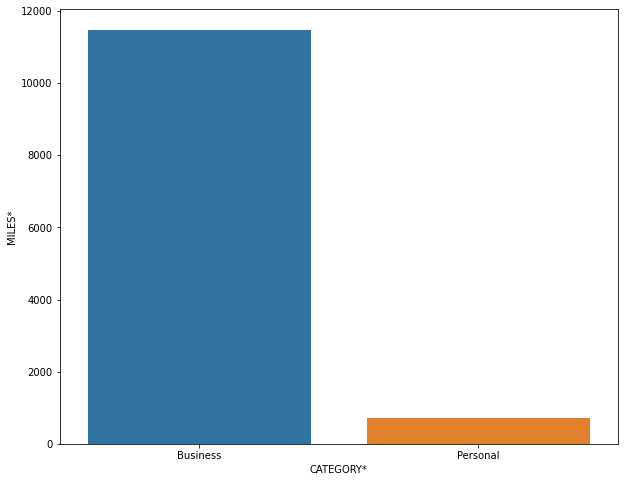

In [13]:
# category and Miles.
CAT_Mil_SUM = dfcopy.groupby('CATEGORY*').sum()
plt.figure(figsize=(10,8))
sns.barplot(x='CATEGORY*',y='MILES*',data=CAT_Mil_SUM.reset_index())
plt.show()